<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Assignment 7</div>
<div style="text-align: right">Hemant Jain, 25 October 2019</div>


**Football**

Load football network in GML format and compute some network statistcs.

Shows how to download GML graph in a zipped file, unpack it, and load into a NetworkX graph.

Requires Internet connection to download the URL http://www-personal.umich.edu/~mejn/netdata/football.zip

In [1]:
try:  # Python 3.x
    import urllib.request as urllib
except ImportError:  # Python 2.x
    import urllib
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read('football.txt').decode()  # read info file
gml = zf.read('football.gml').decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split('\n')[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print('%s %d' % (n, d))

options = {
    'node_color': 'black',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
}
nx.draw(G, **options)
plt.show()

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung 12
FloridaState 12
Iowa 12
KansasState 12
NewMexico 11
TexasTech 12
PennState 12
SouthernCalifornia 12
ArizonaState 11
SanDiegoState 11
Baylor 10
NorthTexas 10
NorthernIllinois 10
Northwestern 11
WesternMichig

C:\Users\JAINHEMANT\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 640x480 with 1 Axes>

Reading the Football GML file 

In [2]:
import networkx as nx
football = nx.read_gml('data/football/football.gml')

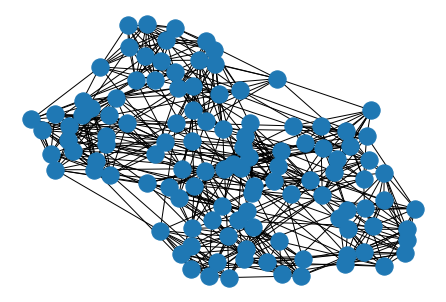

In [3]:
import matplotlib as pl
nx.draw(football,pos=nx.spring_layout(football))

Drawing the labels network using the networkx package.

{'BrighamYoung': Text(-0.21443617982760654, -0.12276204765685685, 'BrighamYoung'),
 'FloridaState': Text(-0.16873935468918838, 0.5830937475154507, 'FloridaState'),
 'Iowa': Text(0.5498728218954431, -0.1902630772670519, 'Iowa'),
 'KansasState': Text(0.11045988043022034, -0.29626848068422273, 'KansasState'),
 'NewMexico': Text(-0.31013000083680164, -0.6767347277028589, 'NewMexico'),
 'TexasTech': Text(-0.18354062625860346, -0.5956839412450338, 'TexasTech'),
 'PennState': Text(0.5380880694888003, -0.0377888156716625, 'PennState'),
 'SouthernCalifornia': Text(0.3592843144116338, -0.7018231548234294, 'SouthernCalifornia'),
 'ArizonaState': Text(0.049560466391326254, -0.9728709253005949, 'ArizonaState'),
 'SanDiegoState': Text(-0.017556291366910684, -0.7090443159596168, 'SanDiegoState'),
 'Baylor': Text(0.09778837011327278, -0.4662997307562187, 'Baylor'),
 'NorthTexas': Text(-0.45063937126241155, -0.48839614439471557, 'NorthTexas'),
 'NorthernIllinois': Text(0.3581669864775827, 0.43362683681

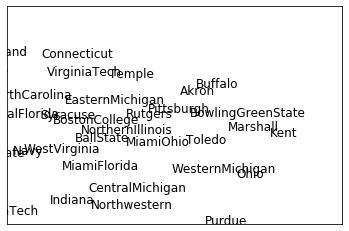

In [4]:
nx.draw_networkx_labels(football,pos=nx.spring_layout(football))

Let's get the adjacency matrix for that graph, in sparse matrix representation. We will use SciPy's `sparse` package for that.  Because a matrix only holds numerical information, we need to maintain a separate list of names corresponding to the graph nodes.

In [5]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
players = np.array(list(football.nodes()))  # array for multi-indexing
Adj = nx.to_scipy_sparse_matrix(football, dtype=np.float64)

In [6]:
players

array(['BrighamYoung', 'FloridaState', 'Iowa', 'KansasState', 'NewMexico',
       'TexasTech', 'PennState', 'SouthernCalifornia', 'ArizonaState',
       'SanDiegoState', 'Baylor', 'NorthTexas', 'NorthernIllinois',
       'Northwestern', 'WesternMichigan', 'Wisconsin', 'Wyoming',
       'Auburn', 'Akron', 'VirginiaTech', 'Alabama', 'UCLA', 'Arizona',
       'Utah', 'ArkansasState', 'NorthCarolinaState', 'BallState',
       'Florida', 'BoiseState', 'BostonCollege', 'WestVirginia',
       'BowlingGreenState', 'Michigan', 'Virginia', 'Buffalo', 'Syracuse',
       'CentralFlorida', 'GeorgiaTech', 'CentralMichigan', 'Purdue',
       'Colorado', 'ColoradoState', 'Connecticut', 'EasternMichigan',
       'EastCarolina', 'Duke', 'FresnoState', 'OhioState', 'Houston',
       'Rice', 'Idaho', 'Washington', 'Kansas', 'SouthernMethodist',
       'Kent', 'Pittsburgh', 'Kentucky', 'Louisville', 'LouisianaTech',
       'LouisianaMonroe', 'Minnesota', 'MiamiOhio', 'Vanderbilt',
       'MiddleTennesseeSt

In [7]:
import pandas as pd
pd.DataFrame(players).T

0             1     2            3          4          5    \
0  BrighamYoung  FloridaState  Iowa  KansasState  NewMexico  TexasTech   

         6                   7             8              9    ...  \
0  PennState  SouthernCalifornia  ArizonaState  SanDiegoState  ...   

          105      106            107          108       109             110  \
0  WakeForest  Indiana  OklahomaState  OregonState  Maryland  TexasChristian   

          111                112       113     114  
0  California  AlabamaBirmingham  Arkansas  Hawaii  

[1 rows x 115 columns]

In [8]:
pd.DataFrame(players[:20]).T

0             1     2            3          4          5   \
0  BrighamYoung  FloridaState  Iowa  KansasState  NewMexico  TexasTech   

          6                   7             8              9       10  \
0  PennState  SouthernCalifornia  ArizonaState  SanDiegoState  Baylor   

           11                12            13               14         15  \
0  NorthTexas  NorthernIllinois  Northwestern  WesternMichigan  Wisconsin   

        16      17     18            19  
0  Wyoming  Auburn  Akron  VirginiaTech

From the adjacency matrix, we derive a transition probability matrix, where every 1-edge is replaced by a probability of 1 over the number of outgoing edges from that species. In the food web, it might make more sense to call this a *lunch probability matrix*.

The total number of team players in our matrix is going to be used a lot, so let's call it $n$:

In [9]:
n = len(players)
Adj

<115x115 sparse matrix of type '<class 'numpy.float64'>'
	with 1226 stored elements in Compressed Sparse Row format>

To reveal `Adj`, do:

In [10]:
Adj.todense()

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

To make it look pretty, pandas to the rescue!


In [11]:
pd.DataFrame(Adj.todense())

0    1    2    3    4    5    6    7    8    9    ...  105  106  107  \
0    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2    0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
3    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
5    0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
6    0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
7    0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
8    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  0.0   
9    1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
10   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
11   0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
12   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
13   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
14   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
16   1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
17   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
18   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
19   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
20   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
21   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  0.0  0.0   
22   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  ...  0.0  0.0  0.0   
23   1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
24   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
25   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
26   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
27   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
28   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
29   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
85   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
86   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
87   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
88   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
89   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
90   1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
91   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
92   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
93   1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
94   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
95   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
96   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
97   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
98   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
99   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
100  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
101  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
102  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
103  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
104  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1

Next, we need the degrees, and, in particular, the diagonal matrix containing the inverse of the out-degrees of each node on the diagonal. Note that numpy's [ravel](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ravel.html) usually returns a view into the existing array (sometimes it returns a copy). [flatten](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.flatten.html) returns a new array.

Also note, there are several sparse matrix classes in `scipy`. If you want to process big data, these representations are your friends. We could have used sparse matrices in our monopoly notebook, as the transfer matrices we built had quite a number of zeros in them.

* bsr_matrix(arg1[, shape, dtype, copy, blocksize]) Block Sparse Row matrix
* coo_matrix(arg1[, shape, dtype, copy]) A sparse matrix in COOrdinate format.
* csc_matrix(arg1[, shape, dtype, copy]) Compressed Sparse Column matrix
* csr_matrix(arg1[, shape, dtype, copy]) Compressed Sparse Row matrix
* dia_matrix(arg1[, shape, dtype, copy]) Sparse matrix with DIAgonal storage
* dok_matrix(arg1[, shape, dtype, copy]) Dictionary Of Keys based sparse matrix.
* lil_matrix(arg1[, shape, dtype, copy]) Row-based linked list sparse matrix

Since we divide by a lot of numbers, some of which can be zero, we use a numpy capability, which can be very dangerous, but also useful sometimes: `np.seterr(divide='ignore')`.

In just two lines of python, we obtain degrees, and build a diagonal matrix with each $(i,i)$ node containing the inverse of the out-degree for that node:

In [12]:
np.seterr(divide='ignore')  # ignore division-by-zero errors

degrees = np.ravel(Adj.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr()

Since adjacency matrices are often sparse, and filled with only ones, plotting them can be quite informative. Let's write a matrix plotting function.

In [13]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(10, 5))
    # you may have to replace 'axisbg' below with 'facecolor', depending on the version of your matplotlib
    ax = fig.add_subplot(111, facecolor='black') #axisbg='b')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

Let's plot the diagonal matrix made of the inverse of the out-degrees of each node, and the food Web matrix, too.

C:\Users\JAINHEMANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

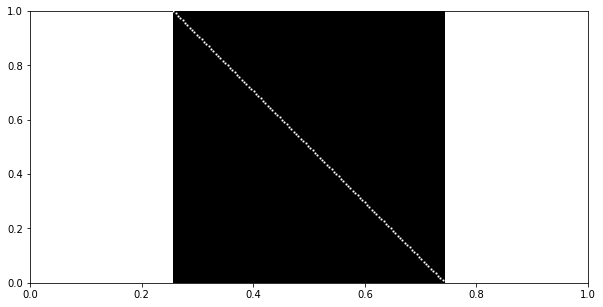

In [14]:
m = sparse.diags(1 / degrees).tocoo()
ax = plot_coo_matrix(m)
ax.figure.show()

C:\Users\JAINHEMANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

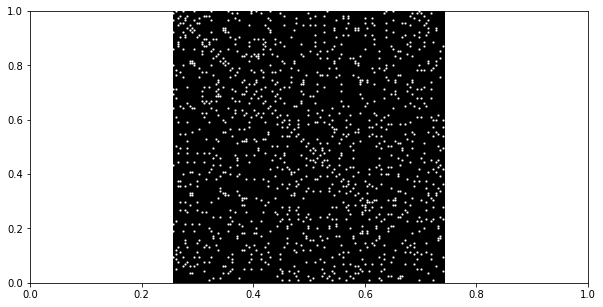

In [15]:
A = Adj.tocoo()
ax = plot_coo_matrix(A)
ax.figure.show()

And for ascii style, with out-degrees on the right margin:

In [16]:
dense = Adj.todense()
#for x in np.nditer(dense, order='K'):
#    print (int(x)),

#for row in dense[0]:
#    numbers =[ np.vectorize(np.int)(x) for x in row ]
#''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '')

# ok this was way too tough!
for i in range(48):
    for row in dense[i]:
        numbers =[ np.vectorize(np.int)(x) for x in row ]
        degrees = np.sum(numbers)
        print(''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '') + ' ' + str(degrees))

[[0100100001000000100000010000000001010000010000000000000000000000010000000000000000000000001001000000000010000000000]] 12
[[1000000000000000000000000101000001000100000001000000000001000000000000000000000000000000010000000000010101000100000]] 12
[[0001001000000111000000000000000000000000000000010000000000001000100000001010000000000000000000000000100000100000000]] 12
[[0010010000010000000000000010000000000000100000000000100000100000000000001010000001001000000000000000001000000000000]] 12
[[1000010001000000100000010000100000000000010000000000000000000000000001000000000000000000000001000000000010001000000]] 11
[[0001100000110000000000000000000000000000000000000000100000000000000000000010000001001000001000000110000000010000000]] 12
[[0010000100000000000000000000000010000001000000010000000100101000100000000000000000000100000000000000100000100000000]] 12
[[0000001010000000000001100000000000000000100000000000000000000000000010000100011000100000000000000000000000001001000]] 12
[[00000001010000

And now compute the transition matrix in the way below, because mutliplying a matrix by a diagonal matrix of factors will mutliply each entry in the matrix by its associated factor:

In [17]:
Trans = (Deginv @ Adj).T
Trans

<115x115 sparse matrix of type '<class 'numpy.float64'>'
	with 1226 stored elements in Compressed Sparse Column format>

Let's verify by examining the first row:

In [18]:
dTrans = Trans.T.todense()
dTrans[0]

matrix([[0.        , 0.08333333, 0.        , 0.        , 0.08333333,
         0.        , 0.        , 0.        , 0.        , 0.08333333,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.08333333, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.08333333, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.08333333, 0.        ,
         0.08333333, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.08333333, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.08333333, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

### Search for the Dominant Eigenvector

If the Google search engine unleashes the silver surfer on our Football Web network, and since he surfs at the speed of light, he totally finds the most linked pages, the way Romans on chariots find Rome. We don't surf at the speed of light, but Prof. Dino told us about the dominant eigenvector, so we know all we need to do is find the eigenvector associated with the eigenvalue = 1, for the graph's transition matrix (don't confuse *transtion matrix* with *adjacency matrix*).

If we call the transition matrix $M$ and the vector of PageRank values (dominant eigenvector) $r$, we have:

$$
\boldsymbol{r} = M\boldsymbol{r}
$$


That is why our browsers **have a browser bar**, where the user enters a URL to surf directly to a page (maybe we get that URL from word-of-mouth). So that way, we *can* get to any Web page. In fact, Google did some research that uncovered that about 85% of the time, we just follow links, and 15% of the time, we enter URLs. So we modify the PageRank algorithm with a so-called "damping
factor", usually taken to be 0.85. 

If we call the damping factor $d$, and $\boldsymbol{1}$ is the Identity matrix, then the modified PageRank equation is:

$$
\boldsymbol{r} = dM\boldsymbol{r} + \frac{1-d}{n} \boldsymbol{1}
$$

or:

$$
(\boldsymbol{I} - dM)\boldsymbol{r} = \frac{1-d}{n} \boldsymbol{1}
$$

I call this equation the **silver surfer formula**, and it shows you the contribution of the URL bar to search results. That is the reason why Google gives out Chrome ***for free***. It needs to **spy** on your URL bar so that it can keep refining the dominant eigenvector for the World Wide Web (have you noticed how aggressive Google has been lately every time we give it a query with another browser?)!


We can solve the silver surfer formula using `scipy.sparse.linalg`'s direct
solver, `spsolve`, because our graph is pretty small, much smaller than the WWW. 


In [19]:
from scipy.sparse.linalg import spsolve

damping = 0.85
beta = 1 - damping

I = sparse.eye(n, format='csc')  # Same sparse format as Trans

pagerank = spsolve(I - damping * Trans,
                   np.full(n, beta / n))

And here's the PageRank for each team-players:

In [20]:
def pagerank_plot(in_degrees, pageranks, names, *,
                  annotations=[], **figkwargs):
    """Plot node pagerank against in-degree, with hand-picked node names."""

    fig, ax = plt.subplots(**figkwargs)
    ax.scatter(in_degrees, pageranks, c=[0.835, 0.369, 0], lw=0)
    for name, indeg, pr in zip(names, in_degrees, pageranks):
        if name in annotations:
            text = ax.text(indeg + 0.1, pr, name)

    ax.set_ylim(0, np.max(pageranks) * 1.1)
    ax.set_xlim(-1, np.max(in_degrees) * 1.1)
    ax.set_ylabel('PageRank')
    ax.set_xlabel('In-degree (number of players of teams)')

Here I have taken only 6 teams in the interesting array variable to do the web plot a neat graph.
Because many teams have the same weights which does the overriding of the same values at the same positions making the web graph more clumsing to understand and difficult to find some conclusion.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


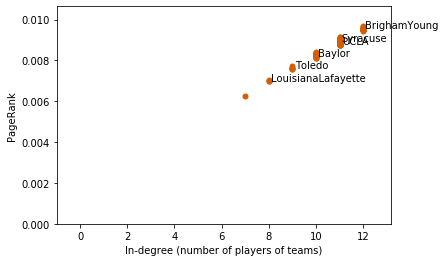

In [21]:
interesting = ['BrighamYoung', 'Baylor','UCLA','Syracuse','Toledo','LouisianaLafayette']
in_degrees = np.ravel(Adj.sum(axis=0))
pagerank_plot(in_degrees, pagerank, players, annotations=interesting)

In [22]:
import pandas as pd
for i, (s, d, p) in enumerate(zip(players, in_degrees, pagerank)):
    print(i, s, '  (' + str(d) + ')   ', p)

0 BrighamYoung   (12.0)    0.00958862353217949
1 FloridaState   (12.0)    0.009639478775787389
2 Iowa   (12.0)    0.00951009630350066
3 KansasState   (12.0)    0.009618410794813645
4 NewMexico   (11.0)    0.008889329551576213
5 TexasTech   (12.0)    0.009678708440532001
6 PennState   (12.0)    0.009549184198728668
7 SouthernCalifornia   (12.0)    0.009495334285949168
8 ArizonaState   (11.0)    0.008847641729408069
9 SanDiegoState   (11.0)    0.008838767659915515
10 Baylor   (10.0)    0.008213988812993327
11 NorthTexas   (10.0)    0.008345934684822353
12 NorthernIllinois   (10.0)    0.008378904871315223
13 Northwestern   (11.0)    0.00882885878575624
14 WesternMichigan   (10.0)    0.008320677084600665
15 Wisconsin   (12.0)    0.009511820641802473
16 Wyoming   (11.0)    0.008849686573858437
17 Auburn   (11.0)    0.009014520336904986
18 Akron   (11.0)    0.009128372470470426
19 VirginiaTech   (11.0)    0.009004065840946929
20 Alabama   (11.0)    0.009026881719370432
21 UCLA   (11.0)    0.

In [23]:
def power(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    r0 = np.full(n, 1/n)
    r = r0
    for _iter_num in range(max_iter):
        rnext = damping * M @ r + (1 - damping) / n
        if np.allclose(rnext, r):
            break
        r = rnext
    return r

Let's go back to matrix `Trans`.

Recall that a transition matrix needs to be *column-stochastic*, in which all column entries sum to 1:

In [24]:
rows = 0
for i in range(48):
    if (np.sum((Trans.todense().T)[i]) != 1.):
        rows += 1
print("non stochastic rows: " + str(rows))

non stochastic rows: 6


oopsie..

Let's take a peek..

In [25]:
for i in range(48):
    print(np.sum((Trans.todense().T)[i]))

0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0


In order to have a **stochastic** matrix, all columns of the transition matrix must sum to 1 (all probabilities need to sum up to 1). This is not satisfied when a species isn't eaten by any others: that column will consist of all zeroes! 

An efficiency is to realise that every row will contribute the same amount to the multiplication of the transition matrix by the current probability vector. That is to say, adding these columns will add a single value to the result of the multiplication of `Trans` by a vector $r$. What value?  1/n times the elements of  $r$  that correspond to a dangling node. This can be expressed as a dot-product of a vector containing  1/n for positions corresponding to dangling nodes, and zero elswhere, with the vector  $r$  for the current iteration. So we can write:

In [26]:
def power2(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    dangling = (1/n) * np.ravel(M.sum(axis=0) == 0)
    r0 = np.full(n, 1/n)
    r = r0
    for _ in range(max_iter):
        rnext = (damping * (M @ r + dangling @ r) +
                 (1 - damping) / n)
        if np.allclose(rnext, r):
            return rnext
        else:
            r = rnext
    return r

You can try this out manually for a few iterations. Notice that if you start with a
stochastic vector (a vector whose elements all sum to 1), the next vector will
still be a stochastic vector. Thus, the output PageRank from this function will
be a true probability vector, and the values will represent the probability
that we end up at a particular species when following links in the food chain.

To verify that these three methods all give the same ranking for the
nodes. `numpy.corrcoef` might be a useful function for this.

`np.corrcoef` gives the **Pearson correlation** coefficient between
all pairs of a list of vectors. This coefficient will be equal to 1 if and only
if two vectors are scalar multiples of each other. Therefore, a correlation
coefficient of 1 is sufficient to show that the above methods produce the same
ranking.

In [27]:
pagerank_power = power(Trans)
pagerank_power2 = power2(Trans)
np.corrcoef([pagerank, pagerank_power, pagerank_power2])

array([[1.        , 0.99999994, 0.99999997],
       [0.99999994, 1.        , 1.        ],
       [0.99999997, 1.        , 1.        ]])

Let's double-check:

In [28]:
for i, (pr, prp, prp2) in enumerate(zip(pagerank, pagerank_power, pagerank_power2)):
    print(i, pr, prp, prp2, prp/prp2)

0 0.00958862353217949 0.009588529275108186 0.00958855374632918 0.9999974478715309
1 0.009639478775787389 0.009639687310776406 0.009639634963489819 1.000005430422084
2 0.00951009630350066 0.009510030838641902 0.009510050050175967 0.9999979798703515
3 0.009618410794813645 0.00961825587587048 0.009618295717451038 0.9999958577297133
4 0.008889329551576213 0.008889110193368464 0.00888916710717623 0.999993597397025
5 0.009678708440532001 0.009678497748393916 0.009678551716904802 0.999994423906338
6 0.009549184198728668 0.009549159019228178 0.009549168017719017 0.9999990576675557
7 0.009495334285949168 0.009494982196915384 0.009495076411322093 0.9999900775514986
8 0.008847641729408069 0.008847289243811788 0.008847382735147836 0.9999894328821476
9 0.008838767659915515 0.008838509498633193 0.00883857754483694 0.9999923012268206
10 0.008213988812993327 0.008213816304418437 0.00821386100005073 0.9999945585112419
11 0.008345934684822353 0.008345796847707036 0.008345831630893887 0.9999958322683239


# Conclusion

We have used the Football-Teams GML file and have performed the graph plots using then networkx package and also doing the web plot showing the interdependency and plot of various football across US according to their respective weights.